In [1]:
from simulate import Simulate
import casadi as cs
import matplotlib.pyplot as plt

In [2]:
a=Simulate(cs.MX(2),cs.MX(1),cs.MX(0))
f=cs.vertcat(a.x[1],-a.x[1]+a.u)
a.set_ode(f)
N=cs.MX(50)
a.set_grid(cs.MX(0),cs.MX(2),N)
x0=cs.DM([0,0])


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:       52
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       50

Total number of variables............................:       52
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        3
Total number of inequality c

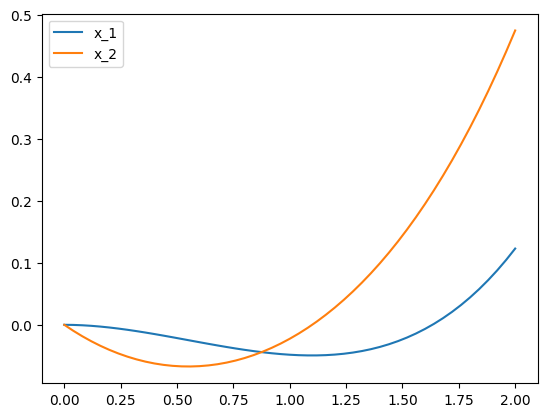

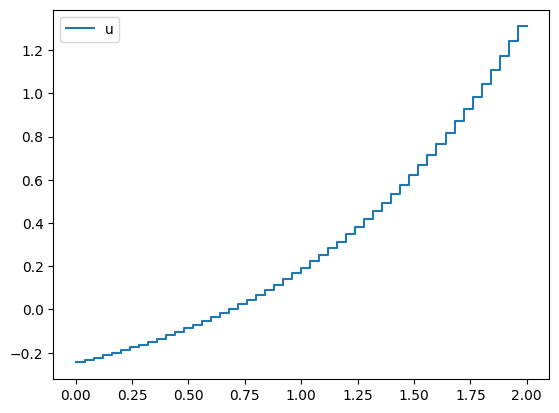

In [3]:
nlp=cs.Opti()
X0=nlp.variable(int(cs.evalf(a.n_x)),1)
U=nlp.variable(int(cs.evalf(a.n_u)),int(cs.evalf(N)))
obj=cs.sumsqr(U)*2/N
a.start(X0=x0,U=U,tol=1e-6)
X=cs.horzcat(X0,a.r['xf'])
nlp.minimize(obj)
nlp.subject_to(X0-x0==0)
nlp.subject_to(cs.horzcat(1,-2.694528)@X[:,-1]+1.155356==0)
nlp.solver('ipopt')
nlp.set_initial(U,cs.np.linspace(0,1,int(cs.evalf(N))))
sol=nlp.solve()
plt.figure()
plt.plot(cs.evalf(a.t_grid).full(),sol.value(X[0,:]),label='x_1')
plt.plot(cs.evalf(a.t_grid).full(),sol.value(X[1,:]),label='x_2')
plt.legend()
plt.show()
plt.figure()
plt.step(cs.evalf(a.t_grid).full(),cs.np.hstack((cs.np.nan,sol.value(U))),label='u')
plt.legend()
plt.show()